<a href="https://colab.research.google.com/github/VladimirVladetic/RUAPAnimals/blob/main/Animals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Layer, Flatten
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

#sickit_learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.utils import class_weight, shuffle

#keras
from keras import applications
from keras import optimizers
from keras.utils import to_categorical
from keras.models import Sequential, Model, load_model
from keras.layers import Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from google.colab import files
import os
import zipfile

In [5]:
uploaded = files.upload()

source_path = '/content/kaggle.json'
destination_path = '/root/.kaggle/kaggle.json'
kaggle_dir = '/root/.kaggle/'
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)
os.rename(source_path, destination_path)

Saving kaggle.json to kaggle.json


In [6]:
! kaggle datasets download -d alessiocorrado99/animals10

100% 583M/586M [00:05<00:00, 38.0MB/s]
100% 586M/586M [00:05<00:00, 117MB/s] 


In [9]:
with zipfile.ZipFile('/content/animals10.zip', 'r') as zip_ref:
  zip_ref.extractall('/content')

In [ ]:
foldernames = os.listdir('/content/raw-img/')
categories = []
files = []
i = 0
for k, folder in enumerate(foldernames):
    filenames = os.listdir("/content/raw-img/" + folder);
    for file in filenames:
        files.append("/content/raw-img/" + folder + "/" + file)
        categories.append(k)

df = pd.DataFrame({
    'filename': files,
    'category': categories
})

In [43]:
print(df[20000:])

                                                filename  category
21350  /content/raw-img/cane/OIP-3ZzSRpl0HKcDd-k3HVbu...         8
21351  /content/raw-img/cane/OIP-GgA30pyEqI8Jpj4GRZky...         8
21352  /content/raw-img/cane/OIP-KD28Uuy5VYA_1rUfNgzT...         8
21353  /content/raw-img/cane/OIP-pCihXpWV9ljgHbRLOtEv...         8
21354  /content/raw-img/cane/OIP-XrcRe0jLjjGBmCNnTitY...         8
...                                                  ...       ...
26174                    /content/raw-img/gatto/612.jpeg         9
26175                    /content/raw-img/gatto/162.jpeg         9
26176                    /content/raw-img/gatto/601.jpeg         9
26177                   /content/raw-img/gatto/1501.jpeg         9
26178                   /content/raw-img/gatto/1633.jpeg         9

[4679 rows x 2 columns]


In [ ]:
## mucca = krava = 0
## ragno = pauk = 1
## scoiattolo = vjeverica = 2
## cavallo = konj = 3
## farfalla = leptir = 4
## elefante = slon = 5
## gallina = kokos = 6
## pecora = ovca = 7
## cane = pas = 8
## gatto = macka = 9

In [22]:
df_test = pd.DataFrame()
target_counts = {0: 150, 1: 150, 2: 150, 3: 150, 4: 150, 5: 150, 6: 150,7: 150, 8: 150, 9: 150}

for categories, count in target_counts.items():
    examples_to_select = df[df['category'] == categories].head(count)

    df_test = pd.concat([df_test, examples_to_select], ignore_index=True)

    df = df.drop(examples_to_select.index)

In [ ]:
print(df)
print(df_test)

In [44]:
animal_mapping = {
    0: 'Krava',
    1: 'Pauk',
    2: 'Vjeverica',
    3: 'Konj',
    4: 'Leptir',
    5: 'Slon',
    6: 'Kokos',
    7: 'Ovca',
    8: 'Pas',
    9: 'Macka'
}

In [47]:
def plot_animals(df):
    plt.figure(figsize=(15, 5))

    # Replace numerical labels with animal names
    df['category_names'] = df['category'].map(animal_mapping)

    # Using seaborn for a count plot
    sns.countplot(data=df, x='category_names', edgecolor='black')

    plt.title('Animal Distribution')
    plt.xlabel('Animal Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility
    plt.show()

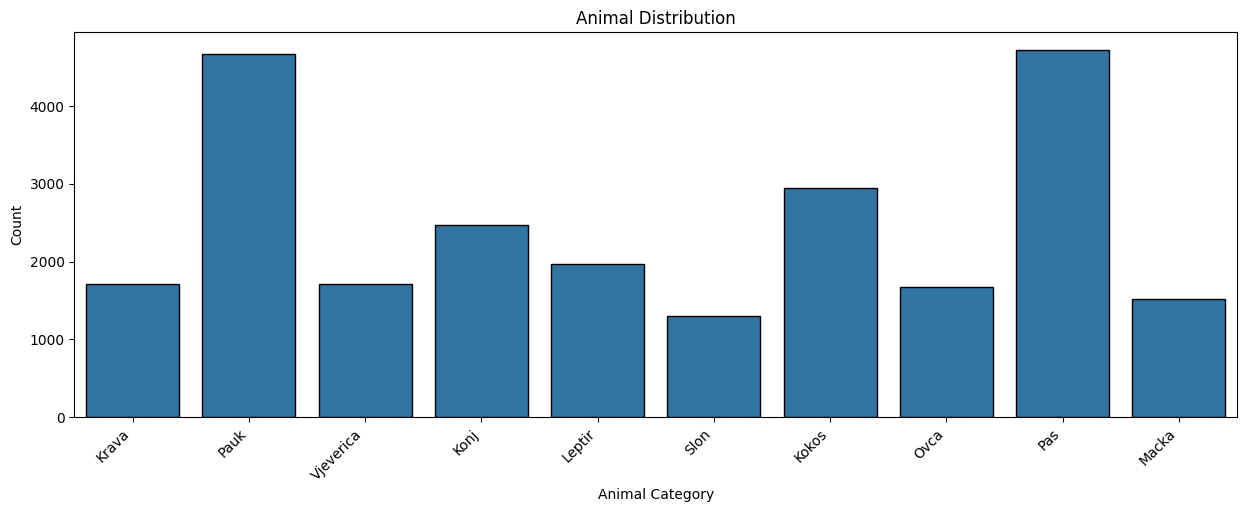

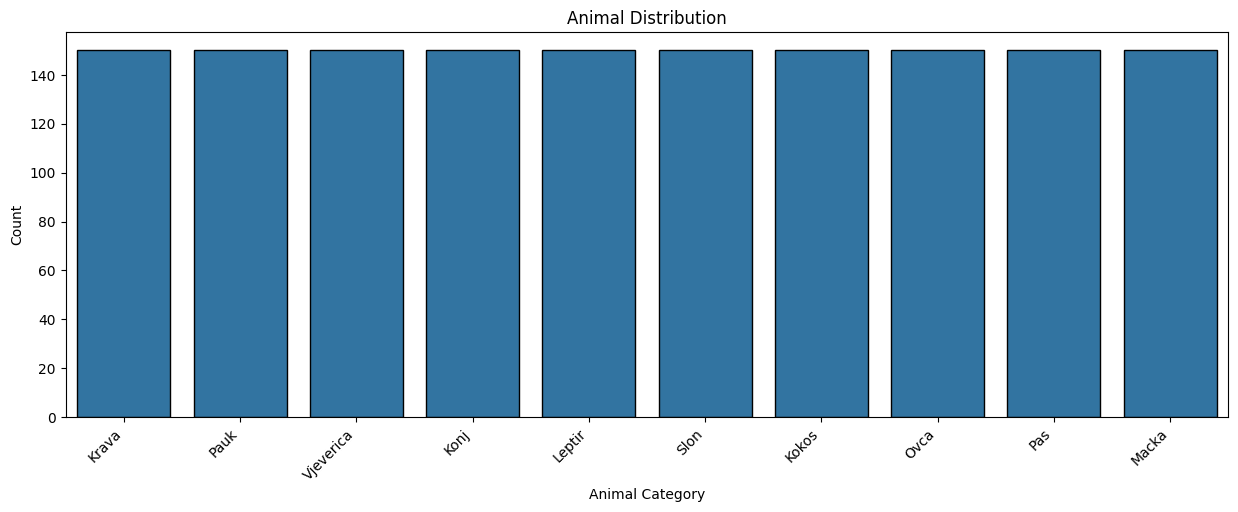

In [48]:
plot_animals(df)
plot_animals(df_test)